In [516]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'RegularizationDataDictionary.xlsx',
 'regularization_student_template.7z',
 'regularization_student_template.ipynb',
 'sample_submission.csv',
 'Solution.ipynb',
 'submission.csv',
 'test_regularization.csv',
 'train_regularization.csv']

In [517]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [518]:
# Code starts here
train= pd.read_csv("train_regularization.csv")
test= pd.read_csv("test_regularization.csv")
train.head(20)








# Code ends here.

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
5,5949,4,1,985000,4,106,7.8,3079,3,2,181,154.0,2016,0,145.03883,0,5549
6,732,2,1,801000,1,106,5.2,3056,2,1,156,87.0,2007,23,144.94980,2,11918
7,6459,2,2,465000,3,196,12.0,3073,1,1,676,61.0,2012,-1,145.02142,2,21650
8,263,4,0,950000,1,150,10.5,3034,3,3,761,281.0,1970,21,144.87140,6,4502
9,5325,3,0,1512000,1,106,5.3,3070,1,0,326,125.0,1905,6,144.99902,2,11364


In [519]:
train.isnull().sum()

Id               0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [520]:
# scaler = MinMaxScaler()
# train["Postcode"]=  pd.DataFrame(scaler.fit_transform(train[["Postcode"]]))
# train["YearBuilt"]=  pd.DataFrame(scaler.fit_transform(train[["YearBuilt"]]))
# train["Propertycount"]=  pd.DataFrame(scaler.fit_transform(train[["Propertycount"]]))
# train["Longtitude"]=  pd.DataFrame(scaler.fit_transform(train[["Longtitude"]]))
# train["BuildingArea"]=  pd.DataFrame(scaler.fit_transform(train[["BuildingArea"]]))
# train["Landsize"]=  pd.DataFrame(scaler.fit_transform(train[["Landsize"]]))
# train["SellerG"]=  pd.DataFrame(scaler.fit_transform(train[["SellerG"]]))

In [521]:
train.head(10)

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
5,5949,4,1,985000,4,106,7.8,3079,3,2,181,154.0,2016,0,145.03883,0,5549
6,732,2,1,801000,1,106,5.2,3056,2,1,156,87.0,2007,23,144.94980,2,11918
7,6459,2,2,465000,3,196,12.0,3073,1,1,676,61.0,2012,-1,145.02142,2,21650
8,263,4,0,950000,1,150,10.5,3034,3,3,761,281.0,1970,21,144.87140,6,4502
9,5325,3,0,1512000,1,106,5.3,3070,1,0,326,125.0,1905,6,144.99902,2,11364


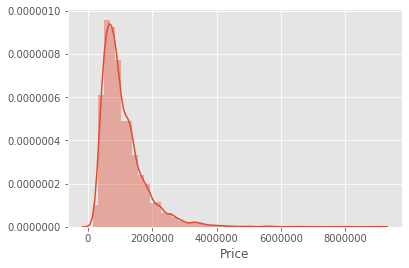

In [522]:
sns.distplot(train['Price'])


In [523]:
skewness = pd.DataFrame(data={'name':list(train),'skew':skew(train)})
skewness

,name,skew
0,Id,-0.010670
1,Rooms,0.208657
2,Type,1.028924
3,Price,2.428791
4,Method,1.071440
5,SellerG,0.129662
6,Distance,1.674437
7,Postcode,3.920111
8,Bathroom,1.327885
9,Car,1.532173


In [524]:
# train['Landsize'] = np.sqrt(train['Landsize'])

# sns.distplot(train['Landsize']);

In [525]:
# train['Landsize'].isnull().sum()
# print(skew(train['Landsize']))

In [526]:
# train['BuildingArea'] = np.log1p(train['BuildingArea'])

# sns.distplot(train['BuildingArea']);

In [527]:
# print(skew(train['BuildingArea']))

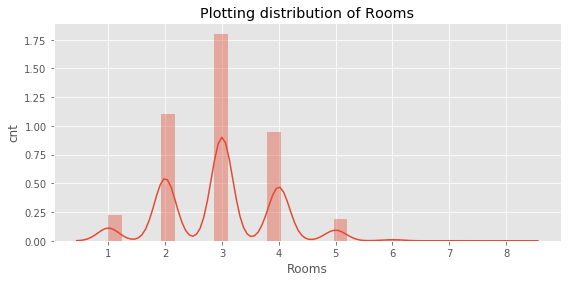

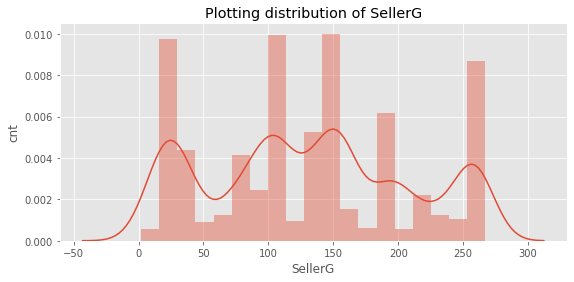

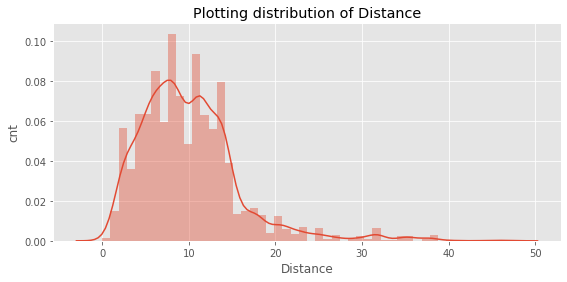

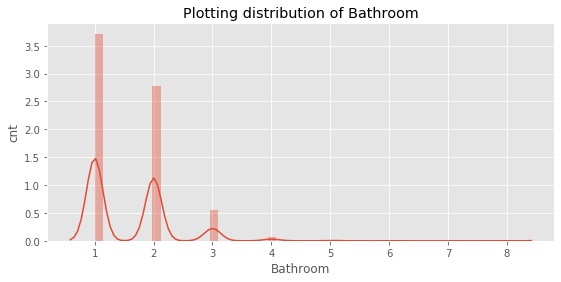

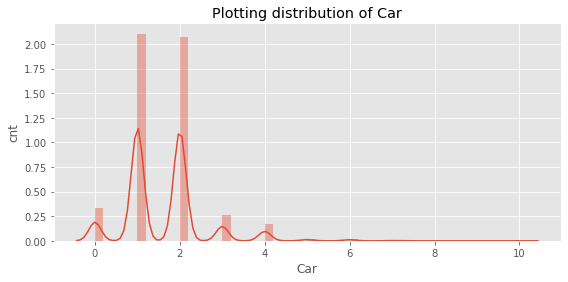

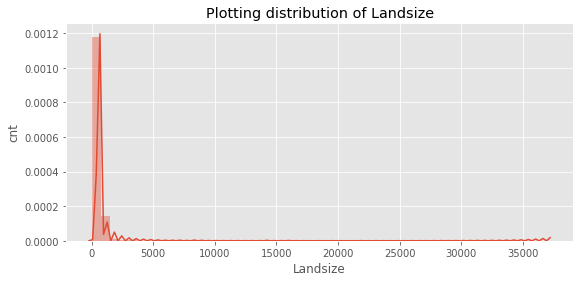

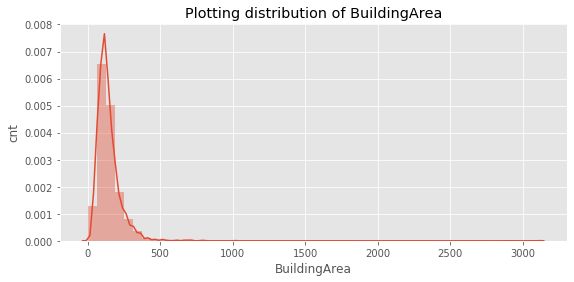

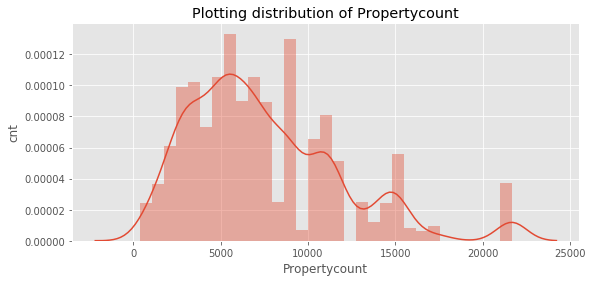

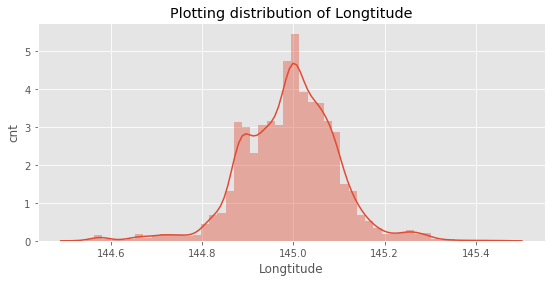

In [528]:
plt.style.use('ggplot')
numerical = ['Rooms','SellerG','Distance','Bathroom','Car','Landsize','BuildingArea','Propertycount','Longtitude']

for column in numerical:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(train[column])
    plt.title('Plotting distribution of '+column)
    plt.xlabel(column)
    plt.ylabel('cnt')

In [529]:
train.shape

(4781, 17)

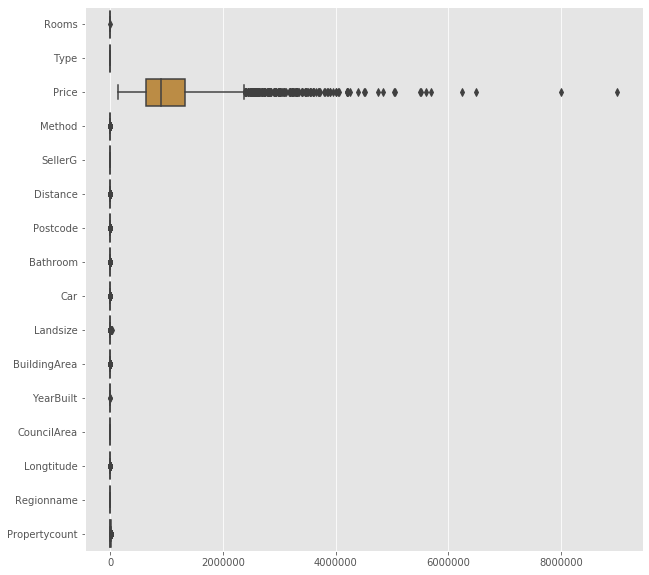

In [530]:
# Feature variables distribution
plt.figure(figsize=(10,10))
sns.boxplot(data=train.drop(['Id'],axis=1), orient='horizontal', palette='husl')

In [531]:
test.head()

,Id,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,5067,4,0,1,32,27.0,3196,2,2,536,202.0,1985,12,145.13286,4,2076
1,3722,4,0,1,28,12.4,3060,2,2,567,116.0,1950,23,144.97030,2,5070
2,6820,5,0,1,16,12.4,3107,3,2,717,310.0,1963,-1,145.11320,0,5420
3,3103,2,2,1,196,3.3,3141,1,1,0,61.0,1965,26,144.98860,5,14887
4,2820,3,0,1,16,11.2,3073,2,1,618,149.0,1965,6,145.02120,2,21650


In [532]:
train = train.drop(['Id'], axis=1)

In [533]:
corr= train.corr()
corr

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.590817,0.523579,-0.053525,-0.029506,0.289699,0.050753,0.607276,0.420030,0.092030,0.595395,-0.056373,-0.207234,0.095944,-0.009092,-0.106854
Type,-0.590817,1.000000,-0.426876,0.088308,0.026955,-0.242188,0.018737,-0.276890,-0.278868,-0.043433,-0.386768,0.304479,0.159736,0.000434,0.055988,0.111803
Price,0.523579,-0.426876,1.000000,-0.048165,-0.065393,-0.158197,0.120166,0.493173,0.237160,0.072753,0.519207,-0.297060,-0.119382,0.217738,0.083803,-0.052399
Method,-0.053525,0.088308,-0.048165,1.000000,-0.008889,-0.064479,-0.034679,-0.013801,-0.019285,-0.021601,-0.048287,0.021274,0.018771,-0.059914,0.033184,-0.024244
SellerG,-0.029506,0.026955,-0.065393,-0.008889,1.000000,0.024476,-0.001913,-0.034939,-0.000271,-0.028470,-0.042596,-0.000680,-0.002784,-0.061029,0.023397,0.063498
Distance,0.289699,-0.242188,-0.158197,-0.064479,0.024476,1.000000,0.414110,0.114934,0.257264,0.063563,0.145823,0.252163,-0.280674,0.210853,-0.089077,-0.063805
Postcode,0.050753,0.018737,0.120166,-0.034679,-0.001913,0.414110,1.000000,0.088003,0.024650,0.030973,0.062701,0.027168,-0.059066,0.423931,0.006935,0.058458
Bathroom,0.607276,-0.276890,0.493173,-0.013801,-0.034939,0.114934,0.088003,1.000000,0.325872,0.080768,0.525465,0.162484,-0.102732,0.109001,0.037968,-0.058078
Car,0.420030,-0.278868,0.237160,-0.019285,-0.000271,0.257264,0.024650,0.325872,1.000000,0.112280,0.318675,0.108676,-0.164842,0.048052,0.005941,-0.032157
Landsize,0.092030,-0.043433,0.072753,-0.021601,-0.028470,0.063563,0.030973,0.080768,0.112280,1.000000,0.081878,0.032836,-0.049492,0.039890,-0.012608,-0.019397


In [534]:
X=train.drop(['Price'], axis=1)
y=train['Price']

In [535]:
# scaler = MinMaxScaler()
# scaled_values = scaler.fit_transform(X)
# X.loc[:,:] = scaled_values

In [536]:
# # Feature variables distribution
# plt.figure(figsize=(10,10))
# sns.boxplot(data=X, orient='horizontal', palette='husl')

In [537]:
# # train.columns.to_list()

# for col in X.columns.to_list():
#     print(col)    
#     Q1= X[col].quantile(0.25)
#     print(Q1)
#     Q3= X[col].quantile(0.75)
#     print(Q3)
#     IQR = Q3-Q1
#     print(IQR)
#     lower_limit =Q1-1.5*IQR
#     upper_limit =Q3+1.5*IQR    
#     X = X[(X[col]>lower_limit) & (X[col]<upper_limit)]

In [538]:
X.shape

(4781, 15)

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [540]:
model=Lasso()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
r2= r2_score(y_test, y_pred)
print(r2)

0.5542507124895557


In [541]:
model=Ridge()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
r2= r2_score(y_test, y_pred)
print(r2)

0.5536580985989902


In [542]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
r2= r2_score(y_test, y_pred)
print(r2)

-0.38321244986443626


In [543]:
# Next predict the house price using cross-validated estimators which are the part of the Model selection: choosing estimators and their parameters.

# Initiate Linear Regression Model
model=LinearRegression()

# Initiate cross validation score
score= cross_val_score(model,X_train,y_train ,scoring= 'r2' ,cv=10)
print(score)
#calculate mean of the score
mean_score = np.mean(score)

# print mean score
print(mean_score)



[0.71077919 0.64374999 0.63804189 0.6361231  0.64068292 0.64252091
 0.46835232 0.62802824 0.69125446 0.60634168]
0.6305874704167587


In [544]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
r2= r2_score(y_test, y_pred)
print(r2)

0.554253949453757


## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [545]:
# Code starts here











# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [546]:
# Code starts here
Id = test['Id']
test =test.drop(['Id'], axis=1)

test_pred = model.predict(test)




submission = pd.DataFrame({'Id':Id,
                           'Price': test_pred})
submission = submission.set_index('Id')
submission.to_csv('submission.csv')







# Code ends here.